In [2]:
#imports
from qiskit import*
from qiskit.tools.visualization import plot_bloch_multivector
import numpy as np
from numpy import linalg as LA
import random
from qiskit.extensions.simulator import snapshot
from matplotlib import pyplot as plt

In [3]:
#initialize state vector

def normalize(vector):
    return vector / LA.norm(vector)

def initialize( vector ):
    circuit.initialize(vector.tolist(),0)
    for i in range(1,3):
            circuit.initialize([1,0],i)


In [4]:
#encode
def encode():
    circuit.cx(0,1)
    circuit.cx(0,2)


In [5]:
def error(error_bitflip):
    circuit.barrier()
    for i in range(3):
        if(random.random() < error_bitflip):
            circuit.x(i)
    circuit.barrier()
   

In [6]:
#correction
def correct():
    circuit.cx(0,1)
    circuit.cx(0,2)
    circuit.ccx(2,1,0)
    
    circuit.snapshot("one_qubit", qubits=[0])
    


In [19]:

def run(circuit,error_prob):
        initial_state = [complex(random.random(),random.random()),complex(random.random(),random.random())]
        #initial_state = [0,1]
        initial_state = normalize(initial_state)
        initialize(initial_state)
        encode()
        error(error_prob)
        correct()
        return initial_state


[1.0, 0.892, 0.816, 0.705, 0.64, 0.562, 0.491, 0.427, 0.375, 0.325, 0.286, 0.24, 0.224, 0.187, 0.121, 0.121, 0.11, 0.058, 0.048, 0.041, 0.017, 0.018, 0.014, 0.007, 0.008, 0.004, 0.0, 0.0, 0.0, 0.0]


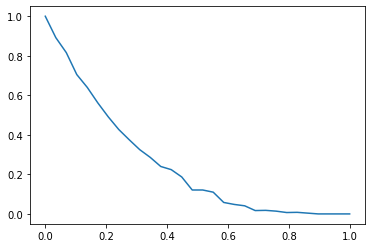

In [12]:

    
p = np.linspace(0,1,30)
fidelity_array = []
for k in p:
    fidelity = 0
    shots = 1000
    circuit = QuantumCircuit(3,2,name="repitition_circ")
    for j in range(shots):
        circuit = QuantumCircuit(3,2,name="repitition_circ")
        initial_state = run(circuit,k)
        simulator = Aer.get_backend('statevector_simulator')
        job = execute(circuit,backend = simulator)
        result = job.result()
        snapshots = result.data()['snapshots']['statevector'].values()
        s = []
        for v in snapshots:
            for i in range(2):
                s.append(complex(v[0][i][0],v[0][i][1]))
        s = np.array(s)
        dot = abs(np.dot(initial_state,s))
        fidelity += dot
    fidelity = fidelity/shots
    fidelity_array.append(fidelity)
    
print(fidelity_array)
%matplotlib inline
plt.plot(p,np.array(fidelity_array))


[0.8849055493784048, 0.7923969220440797, 0.6923029876980294, 0.6258264488820283, 0.5592556930248868, 0.4982704018478705, 0.44038622842613023, 0.4178914932585013, 0.35576572078482643, 0.3259623665337894, 0.2707839222699714, 0.2715847027862138, 0.24134130904599158, 0.21838734486179978, 0.23449778977457222, 0.2269124524500946, 0.23345610307379638, 0.2205209008893954, 0.23997159140962793, 0.2648611596547444, 0.3095918293198636, 0.35027227283534734, 0.38629063553262366, 0.4337408601520501, 0.47707206629656507, 0.5415016343195512, 0.6250610051805569, 0.6822895635775069, 0.7801133767667131, 0.8378793000353291]


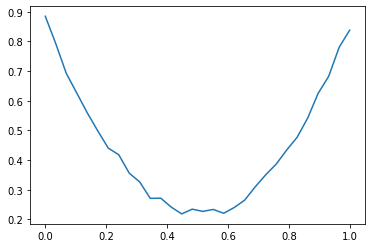

In [20]:
p = np.linspace(0,1,30)
fidelity_array = []
for k in p:
    fidelity = 0
    shots = 1000
    circuit = QuantumCircuit(3,2,name="repitition_circ")
    for j in range(shots):
        circuit = QuantumCircuit(3,2,name="repitition_circ")
        initial_state = run(circuit,k)
        simulator = Aer.get_backend('statevector_simulator')
        job = execute(circuit,backend = simulator)
        result = job.result()
        snapshots = result.data()['snapshots']['statevector'].values()
        s = []
        for v in snapshots:
            for i in range(2):
                s.append(complex(v[0][i][0],v[0][i][1]))
        s = np.array(s)
        dot = abs(np.dot(initial_state,s))
        fidelity += dot
    fidelity = fidelity/shots
    fidelity_array.append(fidelity)
    
print(fidelity_array)
%matplotlib inline
plt.plot(p,np.array(fidelity_array))
